The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [56]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset!
df = pd.read_csv('data/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [57]:
# Find the most common gender and birth country
top_gender = df["sex"].value_counts().index[0]
top_country = df["birth_country"].value_counts().index[0]
print(top_gender)
print(top_country)

Male
United States of America


2000


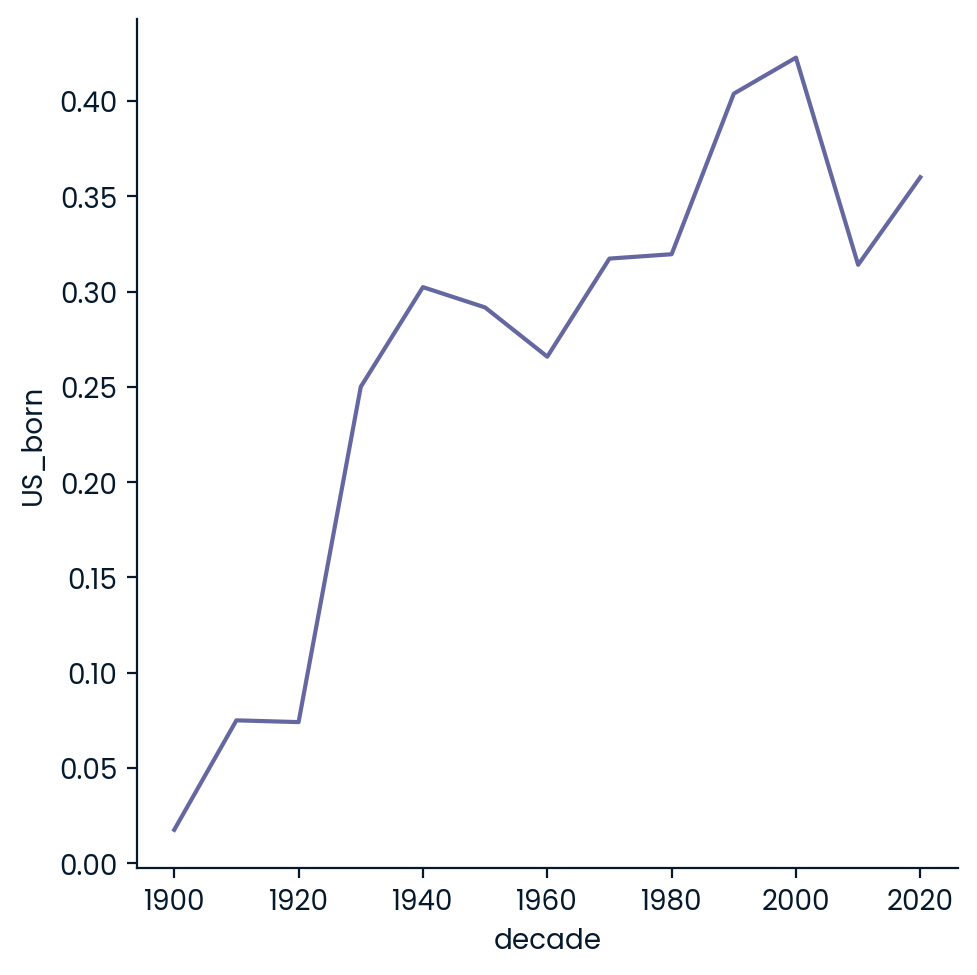

In [58]:
# Find the decade with the highest ratio of US-born Nobel Prize winners

# Create 'US_born' and 'decade' columns
df['US_born'] = df["birth_country"] == "United States of America"
df['decade'] = np.floor(df["year"]/10)*10
df['decade'] = df['decade'].astype(int)
# df.head()

# calculate the proportion of US-born winners by decade
US_ratio = df.groupby("decade", as_index=False)['US_born'].mean()

# Identify the decade with the highest proportion of US-born winners 
max_decade_usa = US_ratio[US_ratio['US_born']==US_ratio['US_born'].max()]['decade'].values[0]
print(max_decade_usa)

# Create a relational line plot
sns.relplot(x='decade', y='US_born', data=US_ratio, kind="line")

{2020: 'Literature'}


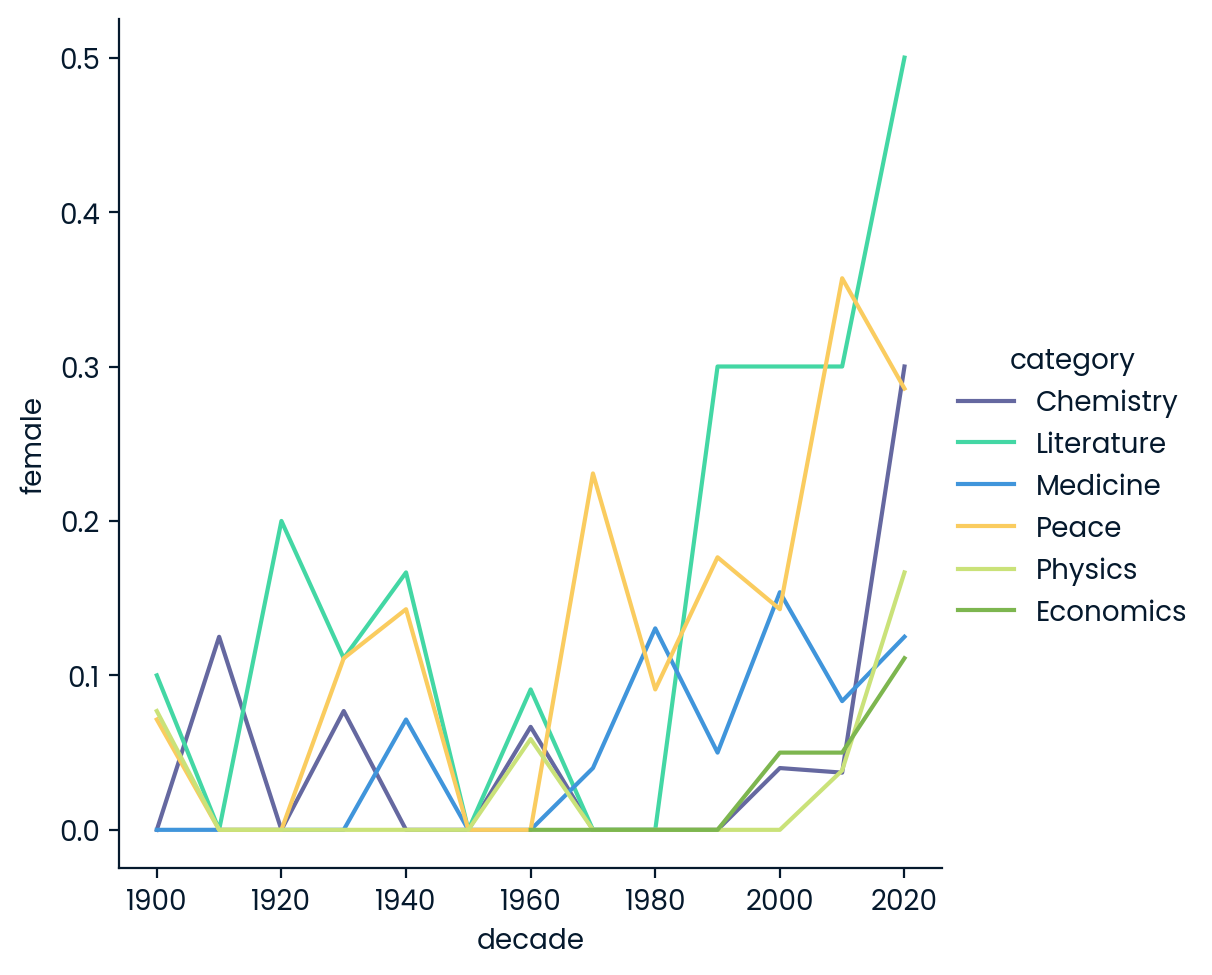

In [59]:
# Find the decade when the highest ratio of female Nobel Prize winners

# Create the 'female' column
df['female'] = df["sex"] == "Female"

# calculate the proportion of female winners by decade
female_ratio = df.groupby(["decade","category"], as_index=False)['female'].mean()
# female_ratio

# Identify the decade and category with the highest proportion of female winners 
max_female_values = female_ratio[female_ratio['female']==female_ratio['female'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_values['decade'].values[0]:max_female_values['category'].values[0]}
print(max_female_dict)

# Create a relational line plot
sns.relplot(x='decade', y='female', hue='category', data=female_ratio, kind="line")

In [60]:
# Find first woman to win a Nobel Prize

# Filter the dataset only with femal winners
female_df = df[df['female']]
female_df

# Find the earliest year in the 'year' column
min_row = female_df[female_df['year'] == female_df['year'].min()]
# print(min_row)

# Save string answers as first_woman_name and first_woman_category
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [61]:
# Determine repeat winner

# Count the Nobel Prize per each person
counts = df['full_name'].value_counts()

# Find counts of two or more
repeat_list = list(counts[counts >=2].index)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
